In [4]:
import json

# Load data from the JSON file
with open('7ShabazzWay.json', 'r') as f:
    data = json.load(f)
    
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}

In [6]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [5]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)

Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 357
    Sample 2: 678
    Sample 3: 796
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 4
  Sample 1: {'pitchDegrees': 45.6794, 'azimuthDegrees': 125.6181, 'stats': {'areaMeters2': 54.87549, 'sunshineQuantiles': [381, 854, 1022, 1120, 1190, 1254, 1288, 1329, 1353, 1390, 1493], 'groundAreaMeters2': 38.34}, 'center': {'latitude': 42.329844099999995, 'longitude': -71.0804842}, 'boundingBox': {'sw': {'latitude': 42.3297831, 'longitude': -71.080547}, 'ne': {'latitude': 42.329893399999996, 'longitude': -71.0804161}}, 'planeHeightAtCenterM

In [8]:
import json

# Assuming data has been loaded into a dictionary named `data` from your JSON file
solarPotential_data = data['solarPotential']

def get_sample_bounding_boxes(data):
    # Extract the 'roofSegmentStats' list
    roof_segment_stats = data.get('roofSegmentStats', [])
    
    # Create a list to hold the bounding boxes, azimuthDegrees, and centers
    samples = []

    # Loop through each segment in the roof segment stats
    for segment in roof_segment_stats:
        # Extract the required information
        bounding_box = segment.get('boundingBox', {})
        azimuth_degrees = segment.get('azimuthDegrees', None)
        center = segment.get('center', {})
        
        # Add the extracted information to the samples list
        samples.append({
            'boundingBox': bounding_box,
            'azimuthDegrees': azimuth_degrees,
            'center': center
        })
    
    return samples

# Call the function and store the result
sample_data = get_sample_bounding_boxes(solarPotential_data)

# For demonstration, print the results
for idx, sample in enumerate(sample_data):
    print(f"Sample {idx+1}:")
    print(f"Bounding Box: {sample['boundingBox']}")
    print(f"Azimuth Degrees: {sample['azimuthDegrees']}")
    print(f"Center: {sample['center']}")
    print()  # Just to add an empty line between samples


Sample 1:
Bounding Box: {'sw': {'latitude': 42.3297831, 'longitude': -71.080547}, 'ne': {'latitude': 42.329893399999996, 'longitude': -71.0804161}}
Azimuth Degrees: 125.6181
Center: {'latitude': 42.329844099999995, 'longitude': -71.0804842}

Sample 2:
Bounding Box: {'sw': {'latitude': 42.3298124, 'longitude': -71.080569}, 'ne': {'latitude': 42.329896999999995, 'longitude': -71.0804656}}
Azimuth Degrees: 306.53458
Center: {'latitude': 42.329856799999995, 'longitude': -71.0805295}

Sample 3:
Bounding Box: {'sw': {'latitude': 42.3297884, 'longitude': -71.0805005}, 'ne': {'latitude': 42.3298433, 'longitude': -71.0804502}}
Azimuth Degrees: 215.66063
Center: {'latitude': 42.32981540000001, 'longitude': -71.08047839999999}

Sample 4:
Bounding Box: {'sw': {'latitude': 42.32982, 'longitude': -71.08049710000002}, 'ne': {'latitude': 42.3298507, 'longitude': -71.08043909999999}}
Azimuth Degrees: 34.560474
Center: {'latitude': 42.3298399, 'longitude': -71.0804646}



In [18]:
# Assuming `data` is your loaded JSON data
solarPotential_data = data['solarPotential']

# Initialize an empty list to hold the samples
samples = []

# Since we do not have the actual dimensions of each panel, we will estimate the width and height
# using the bounding box coordinates. This is a simplification and might not reflect the actual panel dimensions.
for segment in solarPotential_data['roofSegmentStats']:
    # Calculate width and height as the distance between the bounding box coordinates
    width = geodesic((segment['boundingBox']['sw']['latitude'], segment['boundingBox']['sw']['longitude']),
                     (segment['boundingBox']['sw']['latitude'], segment['boundingBox']['ne']['longitude'])).meters
    height = geodesic((segment['boundingBox']['sw']['latitude'], segment['boundingBox']['sw']['longitude']),
                      (segment['boundingBox']['ne']['latitude'], segment['boundingBox']['sw']['longitude'])).meters
    
    # Add the sample to the list
    samples.append({
        'center': segment['center'],
        'width': width,  # in meters
        'height': height,  # in meters
        'azimuthDegrees': segment['azimuthDegrees']
    })

print (samples)


[{'center': {'latitude': 42.329844099999995, 'longitude': -71.0804842}, 'width': 10.788987250708104, 'height': 12.252090078018156, 'azimuthDegrees': 125.6181}, {'center': {'latitude': 42.329856799999995, 'longitude': -71.0805295}, 'width': 8.522389335150123, 'height': 9.397342008909435, 'azimuthDegrees': 306.53458}, {'center': {'latitude': 42.32981540000001, 'longitude': -71.08047839999999}, 'width': 4.145806058999639, 'height': 6.098275092585032, 'azimuthDegrees': 215.66063}, {'center': {'latitude': 42.3298399, 'longitude': -71.0804646}, 'width': 4.780449923966604, 'height': 3.4101465567882236, 'azimuthDegrees': 34.560474}]


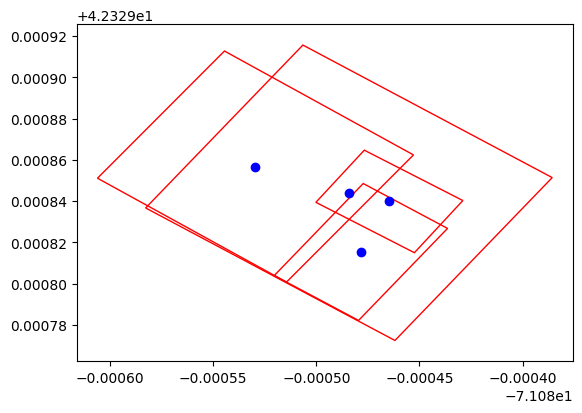

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from geopy.distance import geodesic
from geopy.point import Point

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    
    # Assuming the azimuth_degrees is pointing to the top of the panel
    # Calculate the top center point
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    # Calculate the bottom center point
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    
    # Calculate the corners
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    
    return [top_left, top_right, bottom_right, bottom_left]

# Function to draw a polygon representing a panel on the plot
def draw_panel(ax, corners):
    polygon = patches.Polygon([(point.longitude, point.latitude) for point in corners], closed=True, edgecolor='r', fill=False)
    ax.add_patch(polygon)


# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Prepare lists to hold the latitude and longitude values for setting plot bounds
lats = []
longs = []

# Draw each sample on the plot
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    draw_panel(ax, corners)
    
    # Append the corner coordinates to the lists
    lats += [corner.latitude for corner in corners]
    longs += [corner.longitude for corner in corners]

    # Plot the center of the panel
    ax.plot(sample['center']['longitude'], sample['center']['latitude'], 'bo')

# Set the bounds of the plot
margin = 0.00001  # Increase margin if necessary
ax.set_xlim(min(longs) - margin, max(longs) + margin)
ax.set_ylim(min(lats) - margin, max(lats) + margin)

# Show the plot
plt.show()


In [31]:
import folium
from geopy.distance import geodesic
from geopy.point import Point

# Using a CartoDB tileset for the map
tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png'

# Initialize the map with the CartoDB tileset and a high max_zoom
m = folium.Map(
    location=[42.3298, -71.0806],
    zoom_start=18,
    max_zoom=30,  # Set a very high max_zoom in case it's supported
    tiles=tiles,
    attr='© OpenStreetMap contributors, © CARTO'
)

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    return [top_left, top_right, bottom_right, bottom_left]

# Initialize the map with a sample center point
m = folium.Map(location=[42.3298, -71.0806], zoom_start=18)

# Draw each sample on the map
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    # Convert corners to a format that folium understands: [[lat, lon], [lat, lon], ...]
    corners = [(corner.latitude, corner.longitude) for corner in corners]
    # Create a Polygon with the corners and add it to the map
    folium.Polygon(
        locations=corners,
        color='blue',
        weight=2,
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
    ).add_to(m)

# Save the map to an HTML file
m



In [40]:
import geemap

# Initialize the map
Map = geemap.Map()

# Define the center of your map
latitude = 42.3298
longitude = -71.0806
Map.set_center(longitude, latitude, zoom=21)  # You can set a high zoom level

# Add bounding boxes to the map
# Define your bounding boxes here
features = []

# Sample bounding box using ee.Geometry.Rectangle
rectangle = ee.Geometry.Rectangle([longitude - 0.001, latitude - 0.001, longitude + 0.001, latitude + 0.001])
features.append(rectangle)

# Create a FeatureCollection from the list of features
fc = ee.FeatureCollection(features)

# Add the FeatureCollection to the map
Map.addLayer(fc, {'color': 'blue'}, 'Bounding Boxes')

# Save the interactive map to an HTML file
Map.to_html(outfile='map.html')


In [ ]:
4/1AfJohXk-VHxHjpb3WtQ5_Wd4B8rlK-xR98cNKIZYTJM7BsfkWNP_J7G-DnI

API Key obtained: eyJjaWQiOjI2OTYyMDcwLCJzIjoiMTY5OTU4MzkyNSIsInIiOjE4NCwicCI6WyJ1c2VyIl19
